# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: 2__

__Nombres de los estudiantes: Iñigo Sanz y Berta de Pablo__

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `countries_of_the_world.csv` que se proporciona junto con la práctica. Usa como índice el nombre de los países. 

Vamos a eliminar la columna `Region` por ser categórica y todas las filas en las que faltan valores usando la operación `dropna`.

Muestra el dataframe resultante y explica cuántos países y variables contiene.

In [23]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [24]:
df = pd.read_csv ('countries_of_the_world.csv')
df.set_index("Country", inplace = True)
df = df.drop(['Region'], axis=1)
df = df.dropna(axis = 0)
print (df)

                    Population  Area (sq. mi.)  Pop. Density (per sq. mi.)  \
Country                                                                      
Afghanistan           31056997          647500                        48.0   
Albania                3581655           28748                       124.6   
Algeria               32930091         2381740                        13.8   
Anguilla                 13477             102                       132.1   
Antigua & Barbuda        69108             443                       156.0   
...                        ...             ...                         ...   
Venezuela             25730435          912050                        28.2   
Vietnam               84402966          329560                       256.1   
Yemen                 21456188          527970                        40.6   
Zambia                11502010          752614                        15.3   
Zimbabwe              12236805          390580                  

Nuestro dataframe tiene exactamente 179 países y 18 variables. Originalmente tiene 20, pero hemos quitado la columna Región y Country (al ser esta el índice)

## 2) Análisis de los datos

En este notebook vamos a trabajar con un subconjunto de las variables. Crea un nuevo dataframe que sólo contenga las variables `GDP ($ per capita)`, `Literacy (%)`, `Phones (per 1000)`, `Agriculture`, `Industry` y `Service`. ¿Qué crees que representan cada una de esas variables?

Analiza razonadamente las distribuciones de cada una de las variables (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [25]:
df1 = df.loc[:, ['GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Agriculture', 'Industry', 'Service']]
print(df1)

                    GDP ($ per capita)  Literacy (%)  Phones (per 1000)  \
Country                                                                   
Afghanistan                      700.0          36.0                3.2   
Albania                         4500.0          86.5               71.2   
Algeria                         6000.0          70.0               78.1   
Anguilla                        8600.0          95.0              460.0   
Antigua & Barbuda              11000.0          89.0              549.9   
...                                ...           ...                ...   
Venezuela                       4800.0          93.4              140.1   
Vietnam                         2500.0          90.3              187.7   
Yemen                            800.0          50.2               37.2   
Zambia                           800.0          80.6                8.2   
Zimbabwe                        1900.0          90.7               26.8   

                    Agri

* Representación de cada una de estas variables:


GDP ($ per capita) - el GDP (Gross Domestic Product) indica el total de bienes y servicios producidos por cada país menos los gastos de bienes y servicios utilizados para producirlos. Representa la economia de un país.

Literacy (%) - Porcentaje de personas en un país que saben leer y escribir.

Phones (per 1000) - Número de personas que tienen un teléfono por cada 1000.

Agriculture - La proporción que en el GDP del país representa la agricultura.

Industry - La proporción que en el GDP del país representa la industria.

Service - La proporción que en el GDP del país representan los servicios.

In [26]:
df1.describe()

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,9125.698324,81.944134,208.151955,0.156905,0.288028,0.554508
std,9644.123141,19.837537,210.121875,0.151343,0.140310,0.165670
min,500.000000,17.600000,0.200000,0.000000,0.032000,0.062000
25%,1800.000000,69.950000,27.100000,0.039000,0.197000,0.424500
50%,5100.000000,90.900000,137.100000,0.101000,0.274000,0.559000
75%,12950.000000,97.800000,335.000000,0.233000,0.349000,0.668500
max,37800.000000,100.000000,898.000000,0.769000,0.906000,0.954000


El valor "mean" representa la media de cada variable que tenemos en la tabla. Esta es la media poblacional que sale de hacer la media de cada país y después, la media de todos los paises. Al realizar esta operación con 179 países la representación numérica no es muy útil porque hay muchas medias de cada país que no se distribuyen alrededor de la media poblacional, por ejemplo, si nos fijamos en la media de GDP($ per capita) nos sale un valor de 9125.698324, pero si miramos países más pobres como puede ser Afghanistan, que tiene una media de 700.0  ó algún país más rico que supere los 30.000 podemos ver que la distancia a la media poblacional es enorme.

Ahora bien, como también tenemos el valor de la desviación típica que representa la separación entre cualquier valor de la serie de paises y la media aritmética de todos ellos, podemos analizar mejor estos datos. Siguiendo con el ejemplo de antes del GDP($ per capita) nos sale un std igual a 9644.123141, tiene sentido que este valor sea más o menos elevado por lo que hemos explicado anteriormente, decimos "más o menos" porque si nos fijamos en el diagrama de densidad que hemos generado más abajo de esta variable podemos ver cómo la gran mayoría de países se encuentra entre 5.000 y 15.000 (que si que se acercan a la media poblacional), que hacen que la desviación típica disminuya (cuánto más pequeña la desviación típica, mayor es el parecido entre los datos que se están comparando).

El valor "min" nos indica el valor más bajo que existe de cada variable, en este caso podemos interpretar que el valor mínimo del GDP($ per capita), Literacy(%), Phones(per 1000) e Industry se corresponderían a países más bien pobres. Al contrario que con el valor "max", que para estas variables corresponderían a países más ricos.

Para analizar los rangos usaremos el ejemplo de la Industria y los Servicios. Empezaremos con la Industria, que tiene un valor de 0.197000 en el percentil 25, lo que quiere decir que un 25% de los países tienen una proporción en el GDP que representa la industria menor o igual a 0.197000. En el percentil 50 tenemos un valor de 0.274000, así que un 50% de los paises tiene una proporción menor o igual a 0.274000. Y por último, el 75% de los países tienen una proporción que representa la industria menor o igual a 0.349000. En cambio, si ahora nos fijamos en los rangos de los servicios podemos ver como en el percentil 25 el valor obtenido es mayor al percentil 75 de la Industria, esto quiere decir que la mayoría de los países van a obtener su GDP($ per capita) gracias a los servicios, en concreto un 50% de los paises va a tener una proporción mayor a 0.559000 destinada a los servicios.

In [27]:
# coeficientes de correlación entre pares de variables
# Valor cercano a 1 indica correlación directa
# Valor cercano a -1 indica correlación inversa
# Valor cercano a 0 indica no correlación
df1.corr(method='pearson')

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
GDP ($ per capita),1.000000,0.522880,0.883520,-0.616919,0.032855,0.536551
Literacy (%),0.522880,1.000000,0.592042,-0.620514,0.105703,0.474395
Phones (per 1000),0.883520,0.592042,1.000000,-0.631578,-0.084247,0.649638
Agriculture,-0.616919,-0.620514,-0.631578,1.000000,-0.352785,-0.613489
Industry,0.032855,0.105703,-0.084247,-0.352785,1.000000,-0.521413
Service,0.536551,0.474395,0.649638,-0.613489,-0.521413,1.000000


Esta tabla nos da una representación numérica de la correlación entre las variables, podemos ver que la diagonal principal tiene todo valores igual a 1.000000 porque se comparan las mismas variables y por tanto tiene sentido que la correlación sea completamente directa. 

Aquí podemos ver qué pares de variables no tienen ningún tipo de conexión y por ello después no analizaremos sus diagramas de dispersión, porque no nos ofrecerán ninguna información útil. Por ejemplo, si nos fijamos en la relación entre la industria y la alfabetización (Literacy) obtenemos un valor de 0.105703, como este valor es muy cercano a 0 no existe relación alguna entre ambas variables y por tanto no tendrá sentido analizar su diagrama. 

Ahora, si miramos los valores de correlación que obtiene la agricultura con el resto de variables podemos observar que hay una correlación inversa con todas ellas bastante grande, excepto con la Industria que el resultado se acerca más a 0 que a -1. Por lo tanto, cuanto mayor sea el valor de cualquiera de las variables que tenemos en la tabla, menor será el porcentaje de agricultura en el GDP de los países. Lo mismo ocurre con los servicios y la industria, al ser su correlación inversa, cuanto más porcentaje de cualquiera de estas dos variables haya en el GDP de un país, menor será el porcentaje de la otra variable.
También podemos concluir que los países más ricos se van a dedicar principalmente a los servicios porque hay una correlación directa entre Service y GDP de 0.536551, si la renta aumenta el porcentaje de servicios también lo hará, en cambio, podemos concluir que los países más pobres se dedican al sector primario y por eso la agricultura tiene una correlación inversa con el GDP($ per capita).

Para la correlación directa nos fijaremos en el GDP($ per capita) y los Phones(per 1000) donde sale un valor de 0.883520, tiene sentido que si uno aumenta el otro también ya que, si el dinero medio ganado por la población de un país aumenta las probabilidades de que una persona tenga el dinero necesario para poder comprarse un telefono van a aumentar. 

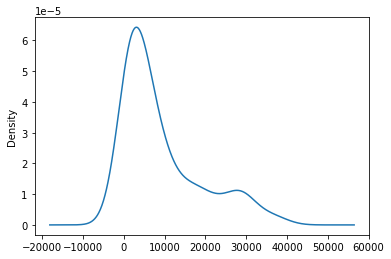

In [28]:
df1['GDP ($ per capita)'].plot.density()

Para representar la relación entre pares de variables vamos a utilizar la función pairplot del paquete seaborn ya que saca un diagrama de dispersión por cada dos variables, donde se puede ver claramente la relación entre ellas y podremos analizar con precisión cuánto dependen unas variables de otras. Además no necesitaremos realizar una gráfica de densidad de cada variable, como la que hay justo encima, porque tendremos esto representado en la diagonal de histogramas de la matriz que sale con la función pairplot.

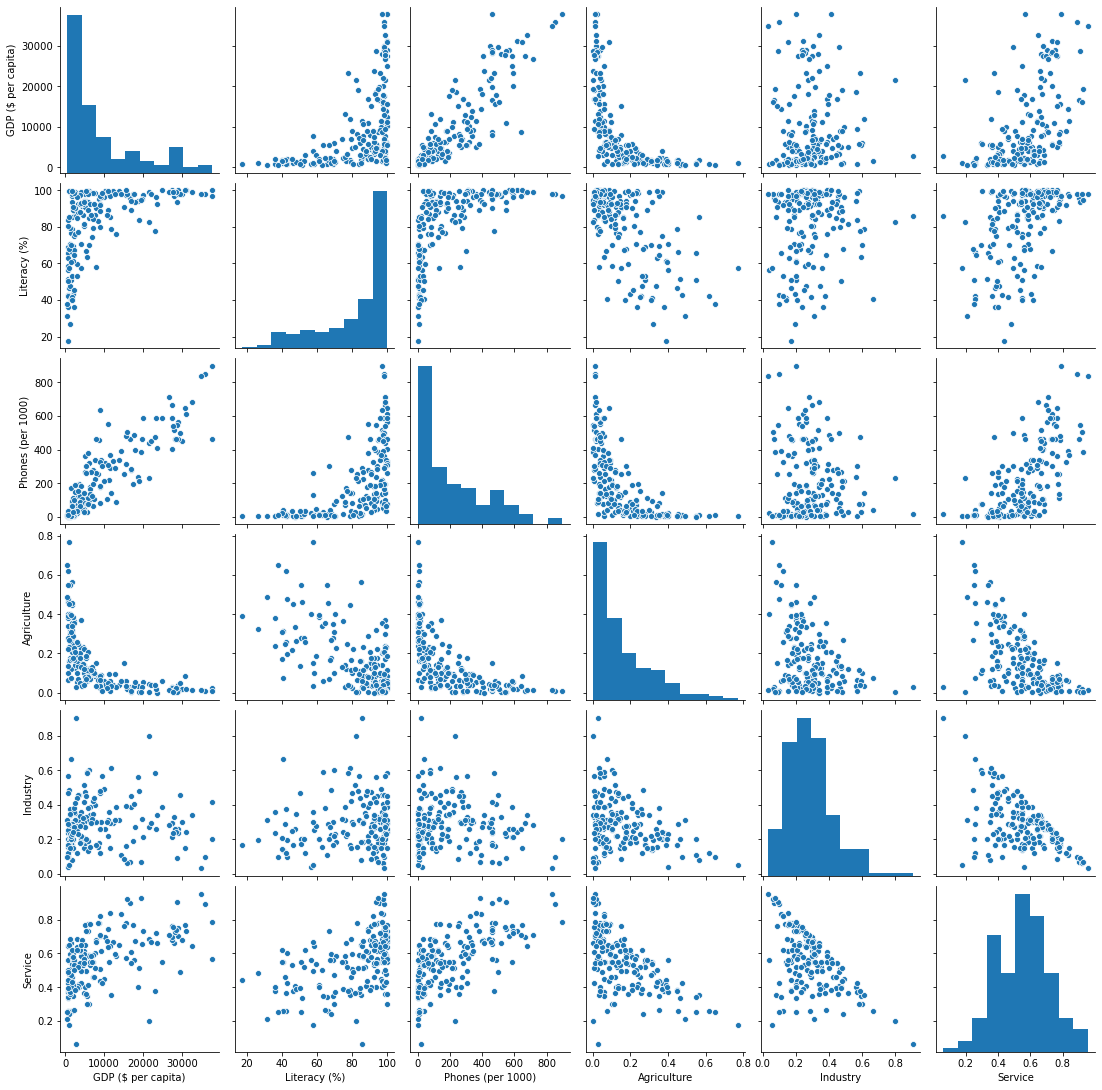

In [29]:
import seaborn as sns

sns.pairplot(df1)

Podemos observar en los diagramas de dispersión que las variables que antes hemos visto que tenian una correlación cercana a 0 como por ejemplo Industry y Literacy ó Industry y Phones(per 1000) ó Industry y GDP($ per capita) cuyas correlaciones eran de 0.105703, -0.084247 y 0.032855 respectivamente, ahora su diagrama no nos da ningún tipo de información ya que no hay ningún sentido en el orden en el que están distribuidos los puntos que representan los países.

Pero por ejemplo si nos vamos a valores de correlación cercanas a 1 (correlación directa) como la del GDP y Phones(per 1000) podemos ver claramente en el diagrama de dispersión cómo a medida que aumenta cualquiera de las dos variables la otra también aumenta significativamente. También podemos observar esto, aunque en menor medida, entre las variables Service y Phones(per 1000) que tienen una correlación de 0.649638 y los puntos en su gráfica de dispersión también tienden a ir más arriba cuánto más a la derecha se sitúen (cuando uno aumenta el otro también).

En cambio, para correlaciones inversas como la de la industria y los servicios podemos distinguir incluso una línea recta descendente bastante clara que muestra que a un valor muy alto de los servicios la industria tiene valores muy bajos y viceversa. Hay una forma mucho más clara en el diagrama de dispersión entre la agricultura y phones(per 1000) ya que los valores más altos de agricultura se acumulan a la derecha de la gráfica, donde el valor de la variable phones(per 100) está en torno a 0 y 200, que son los valores más bajos posibles de esta variable, así que la correlación inversa es bastante clara.

En la diagonal de la matriz tenemos representados los histogramas de cada variable, que representa la cantidad de países que está entre unos valores u otros de cada variable. Por ejemplo, podemos ver que la mayoría de los países que hemos seleccionado para analizar se encuentran mayoritariamente entre 0 y 10.000 de GDP($ per capita) y que solo una pequeña parte de los países supera los 30.000, y si nos fijamos en la gráfica de la variable Service podemos ver cómo un pequeño porcentaje de paises supera el 0.8 en porcentaje de servicios lo que indica que la cantidad de países más ricos es pequeña como también indicaba la gráfica de GDP.  
En cuanto al resto de gráficas, podemos ver como la mayoría de la población no es analfabeta, ya que en la gráfica de Literacy la barra más alta se sitúa en los valores más altos de porcentaje de alfabetización. El número de móviles por cada 1000 habitantes tiende a ser más bien baja (que otra vez tiene sentido porque se parece mucho a la gráfica de GDP de cada país). La industria de los paises se encuentra mayoritariamente en torno a 0 y 0.4 como bien nos indicaban antes los percentiles (el 75% de la población tiene menos de 0.349000 de porcentaje de industria en su GDP) y por último, la gráfica de la agricultura que también coincide con los valores de los percentiles que hemos sacado antes quue indican que el 75% de los países analizados tiene menos o igual a 0.233000 de porcentaje de agricultura en el GDP de su país.

## 3) Preprocesar los datos

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de países similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = df1.values
scaler = MinMaxScaler()
scaler.fit(X)
S2_scaled = scaler.transform(X)

Tenemos que preprocesar los datos porque actualmente tenemos variables con un rango de 0 a 100 como Literacy y otras variables como el GDP per capita que puede llegar a valores de hasta 40.000. Por ello tenemos que reescalar o estandarizarlos. Sin embargo, no podemos estandarizarlos porque no siguen una distribución normal, en el plot de densidad del GDP un poco más arriba vemos que el pico del gráfico está situado en una X inferior a 5.000, sin embargo la media del GDP es 9.125 $.
Por ello decidimos reescalar todas las variables.

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo, el índice davies_boulding y el coeficiente silhouette en función del número de clusters.

In [31]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['r','g','b','c','y','k','m',]
    fig = plt.figure(figsize=(8,8))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
        
    plt.show()

In [32]:
RANDOM_STATE=333

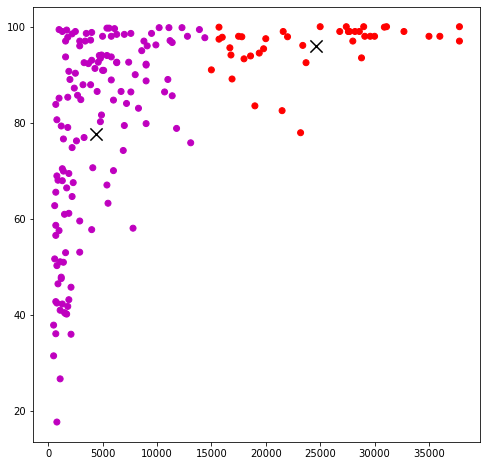

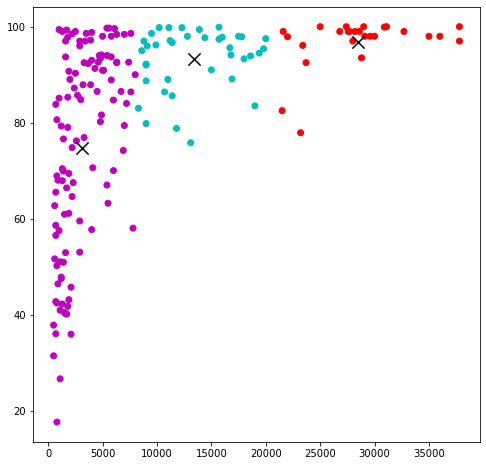

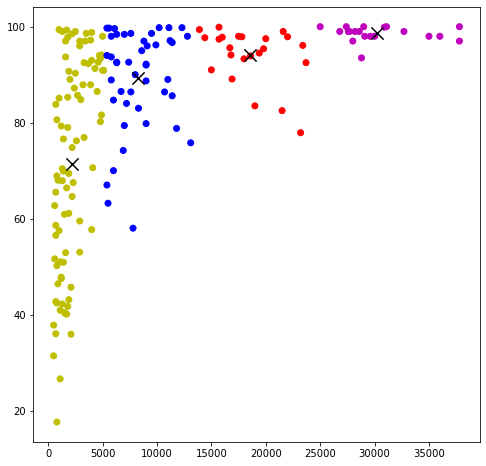

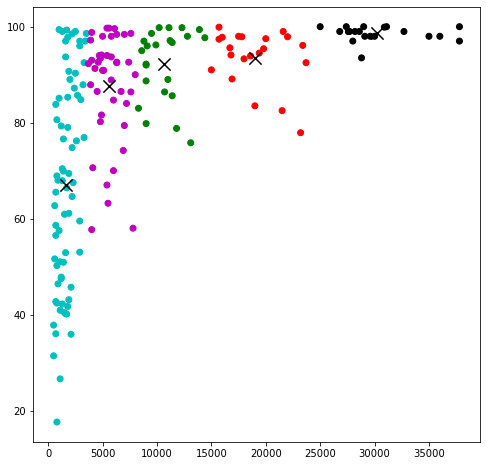

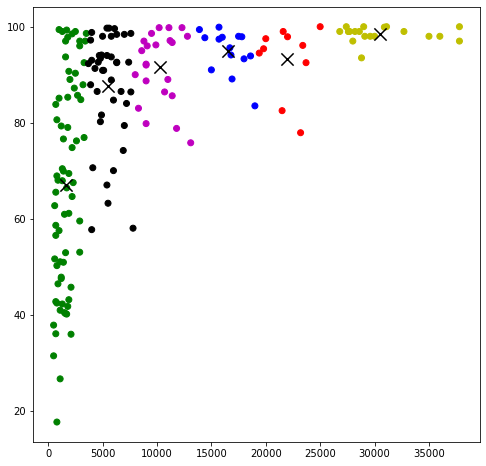

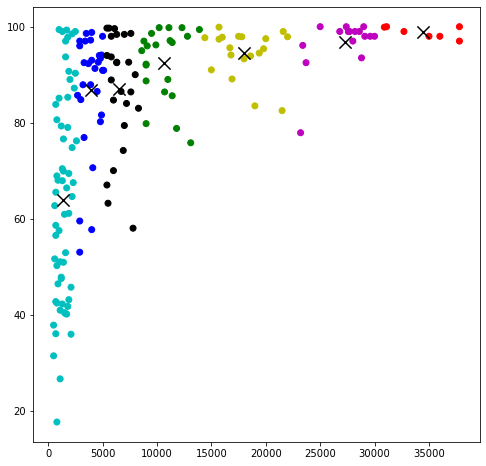

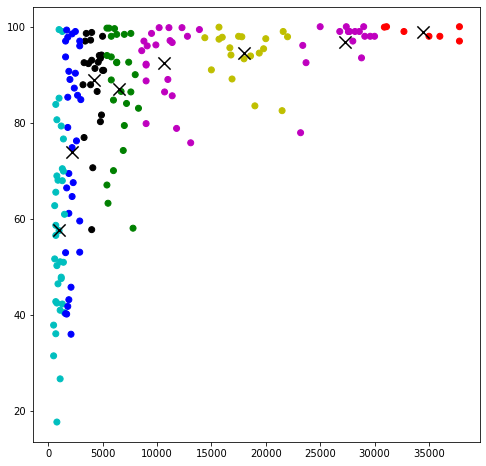

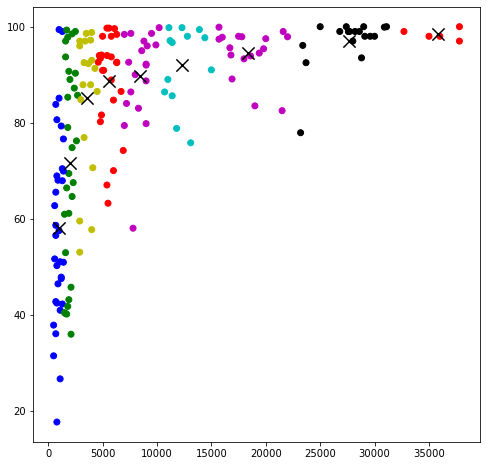

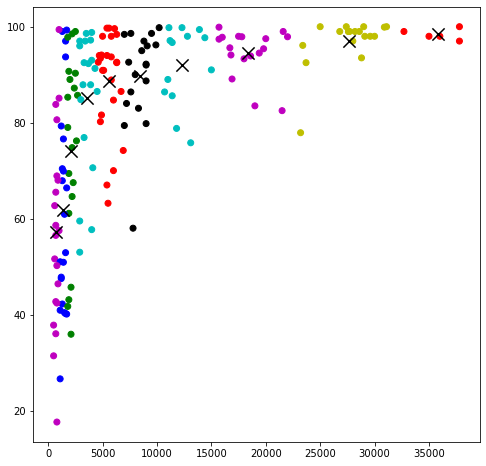

In [33]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

K_MAX = 11
score = np.zeros(K_MAX-2)
davies_boulding = np.zeros(K_MAX-2)
silhouette = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=RANDOM_STATE)
    km.fit(X)
    plot_clusters(X, km.labels_, km.cluster_centers_)
    
    score[k-2] = -1 * km.score(X)
    davies_boulding[k-2] = davies_bouldin_score(X, km.labels_)
    silhouette[k-2] = silhouette_score(X, km.labels_)

DIAGRAMA DEL CODO:

En el diagrama del codo buscamos un valor de K en el que la curva deja de descender tan rápidamente. En este caso podemos ver que K=5 es una buena opción

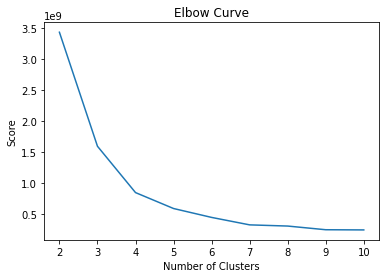

In [34]:
# diagrama del codo
plt.plot(range(2, K_MAX), score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

DAVIES BOULDING

El mejor valor de Davies–Bouldin (el más pequeño) se obtiene para K = 2.

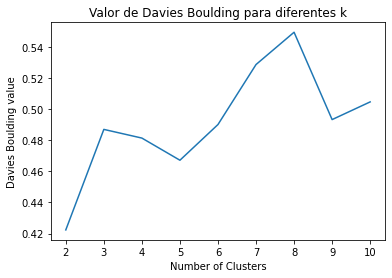

In [35]:
# davies boulding
plt.plot(range(2, K_MAX), davies_boulding)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding value')
plt.title('Valor de Davies Boulding para diferentes k')
plt.show()

SILHOUETTE

El mejor valor de Silhouette (el más cercano a 1) se obtiene para K = 2

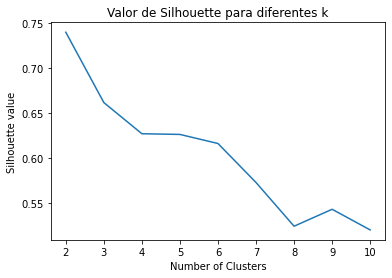

In [36]:
# silhouette
plt.plot(range(2, K_MAX), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette value')
plt.title('Valor de Silhouette para diferentes k')
plt.show()

Los valores más favorecedores para K parecen ser 2 y 5. Mirando la representación de las k-medias para K = 2 y K = 5, preferimos utilizar K = 5 porque tenemos una división más clara de los datos, con clusters más compactos los cuales podremos analizar mejor.

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior y trata identificar el grupo de países que contienen. Si te han salido más de 3 elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar kMeans con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

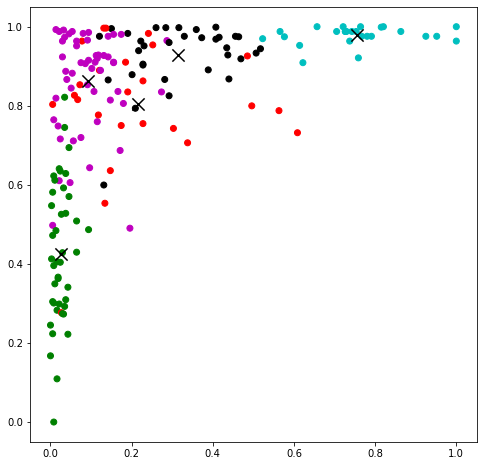

In [37]:
# Usamos k-means con los datos escalados pero asignando las etiquetas de clusters al conjunto df1 con los datos iniciales.
km = KMeans(init='random', n_clusters=5, random_state=RANDOM_STATE)
km.fit(S2_scaled)
labels = km.labels_
centers = km.cluster_centers_

df1['Cluster'] = labels

plot_clusters(S2_scaled, labels, centers)

In [38]:
#Quitamos los clusters 3 y 4 puesto que no los analizamos. Nos quedamos con los clusters representando los países más pobres,
# los más ricos y los más intermedios.
df_claro = df1[df1.Cluster <= 2]

In [39]:
# mostramos la matriz transpuesta para que la info salga en vertical
df_claro.groupby(["Cluster"]).describe().transpose()


Cluster                              0            1             2
GDP ($ per capita) count     25.000000    42.000000     26.000000
                   mean    8540.000000  1421.428571  28669.230769
                   std     6202.821938   738.005127   4626.771594
                   min      700.000000   500.000000  20000.000000
                   25%     4900.000000   800.000000  26950.000000
                   50%     7000.000000  1300.000000  28400.000000
                   75%     9900.000000  1800.000000  30675.000000
                   max    23200.000000  4000.000000  37800.000000
Literacy (%)       count     25.000000    42.000000     26.000000
                   mean      83.952000    52.707143     98.207692
                   std       12.907172    14.612330      1.863958
                   min       40.400000    17.600000     92.500000
                   25%       79.400000    42.250000     97.925000
                   50%       84.800000    51.300000     99.000000
                   75%       92.600000    64.125000     99.000000
                   max       99.700000    85.300000    100.000000
Phones (per 1000)  count     25.000000    42.000000     26.000000
                   mean     151.196000    14.402381    574.888462
                   std      116.752853    21.325543    135.875518
                   min        3.700000     0.200000    405.300000
                   25%       52.000000     3.525000    461.325000
                   50%      137.100000     8.750000    556.100000
                   75%      232.000000    14.550000    639.425000
                   max      475.300000   131.800000    898.000000
Agriculture        count     25.000000    42.000000     26.000000
                   mean       0.077040     0.363524      0.023962
                   std        0.051680     0.140295      0.020739
                   min        0.002000     0.135000      0.000000
                   25%        0.033000     0.263750      0.010000
                   50%        0.073000     0.346000      0.018000
                   75%        0.116000     0.449500      0.035500
                   max        0.187000     0.769000      0.086000
Industry           count     25.000000    42.000000     26.000000
                   mean       0.536880     0.221857      0.260500
                   std        0.120995     0.104107      0.096329
                   min        0.390000     0.040000      0.032000
                   25%        0.457000     0.159750      0.219750
                   50%        0.493000     0.203000      0.260500
                   75%        0.585000     0.284250      0.302000
                   max        0.906000     0.487000      0.460000
Service            count     25.000000    42.000000     26.000000
                   mean       0.386040     0.414786      0.715500
                   std        0.108436     0.117040      0.101361
                   min        0.062000     0.177000      0.490000
                   25%        0.354000     0.350750      0.667750
                   50%        0.402000     0.401000      0.715000
                   75%        0.447000     0.514750      0.755750
                   max        0.583000     0.620000      0.954000

DIAGRAMA DE DISPERSIÓN de todos los pares de variables en función de los clusters (del 0 al 2)

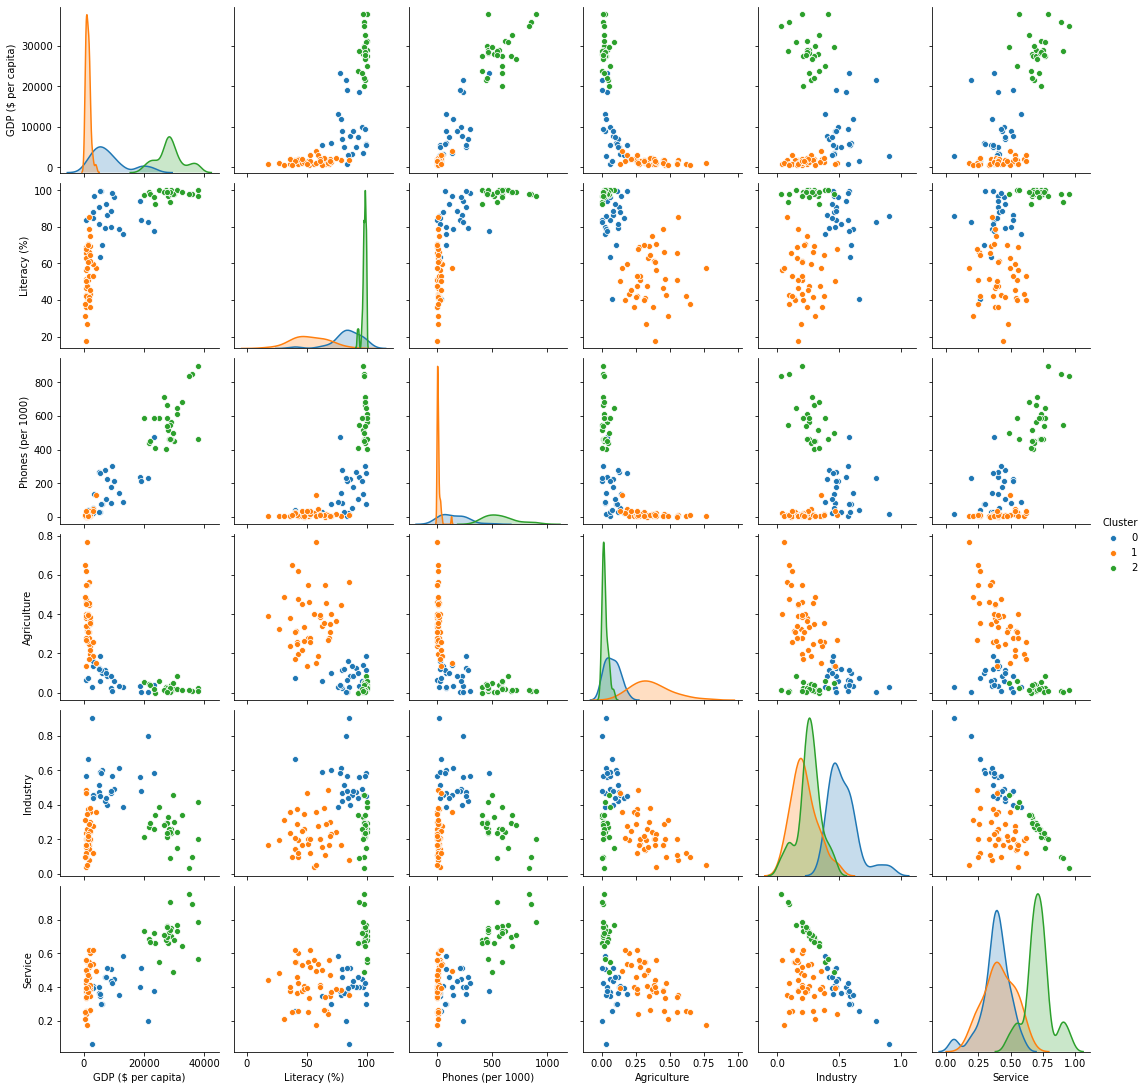

In [40]:
sns.pairplot(df_claro, diag_kind='kde', hue="Cluster")

Puesto que hemos elegido k = 5, teniendo un total de 5 clusters, vamos a centrarnos sobretodo en los clusters 
0, 1 y 2. Observando los descriptores estadísticos de dichos clusters, vemos que en cuanto al GDP estos 
corresponden a los grupos de paises más pobres, medios y más ricos. Además como no miramos los dos clusters 
que quedan en el medio (pobre/medio y medio/rico), podremos diferenciar estos 3 grupos mucho mejor.

El grupo de países con el mayor GDP corresponde al cluster 2, representado con el color verde en todas las gráficas. 
El grupo de países con un GDP medio, es decir no son ni muy ricos ni muy pobres, corresponde al cluster 0, representado con 
el color azul, y por último, el naranja representa al cluster 1 que corresponde con el grupo de países con un GDP bajo.

En la diagonal observamos los histogramas de cada una de las variables y como es representado cada cluster. 
Esto nos permite observar mejor qué clusters se separan mejor y cuáles se confunden más. Por ejemplo, la variable 
del GDP nos muestra cómo los tres clusters están muy diferenciados. Esto tiene sentido puesto que
la principal característica que diferencia nuestros clusters es la economía de los países.

Si nos fijamos en variables que tengan una correlación alta con el GDP, que es la principal variable por la que separamos
a nuestros clusters, podemos observar que esas variables también consiguen distinguir claramente a los grupos de países más
pobres, a los medios y a los más ricos. Por ejemplo, la variable que tiene mayor índice de correlación con el GDP es la "cantidad de
móviles por cada 1000 habitantes" con un valor de 0.88 aproximadamente, y si nos fijamos en las gráficas de esta variable son
muy parecidas a las del GDP, separan significativamente unos clusters de otros. Asímismo, las gráficas de la variable Literacy 
también muestran a los grupos de países bastante separados, no tanto cómo la variable GDP, pero sí podemos ver una clara diferencia
entre los clusters. Esto se debe a que el GDP y la Literacy tienen un índice de correlación más o menos alto, de 0.52 
aproximadamente.

En las gráficas de estas tres variables podemos observar que el cluster que más se diferencia de los otros tres es el verde (el
cluster que contiene a los países más ricos) y los grupos verde y azul se juntan un poco más, pensamos que esto se debe a que
los países ricos tienen un GDP significativamente más alto que el resto y que los países medios tienen valores más cercanos a 
economías débiles que a economías más ricas. 

Por último tenemos los tres pilares del GDP: la agricultura, la industria y los servicios. Los países ricos 
parecen no estar en absoluto interesados en la agricultura, claramente separados de los países medianamente ricos
y los países más pobres. En cuanto a la industria, los tres clusters están bastante más cercanos los unos de los otros,
los países más pobres y los más ricos parece que le dan menos importancia a la industria que los medianamente ricos. 
Por último, podemos deducir que la mayor fuente de ingresos de los países ricos son los servicios y por eso en las gráficas
de servicios el grupo verde (cluster de países ricos) está claramente separado de los otros dos.

Este análisis nos lleva a la conclusión de que los clusters que están mejor separados son el cluster de países
pobres con el cluster de países ricos. Esto tiene mucho sentido si miramos la tabla de correlación que creamos
anteriormente, la mayoria de las variables tienen un coeficiente de Pearson de más de 0.5 (sea correlación 
directa o inversa) con el GDP. Esto significa que países con una diferencia mayor de GDP se separarán mucho 
más con cada variable, diferenciando más sus clusters.

Los clusters que se confunden más parecen ser el de los países pobres y el de los países medianamente ricos. 
Una vez más, esto cobra sentido cuando miramos los descriptores estadísticos de estos clusters, el GDP del cluster
de países medianamente ricos se sitúa alrededor de 8.540 mientras que el GDP de los paises mas pobres esta al rededor de 1.421.
Esta diferencia es muchísimo menor que si comparasemos sus GDPs con el del cluster de los países más 
ricos. Por este motivo, los clusters que se confunden más son los dos más cercanos en cuanto al GDP.